# Stock Market Prediction and Forecasting using LSTM

Author: Parth Salke

# Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data=pd.read_csv("C:\\Users\\Parth Salke\\Downloads\\Datasets\\NSE-TATAGLOBAL.csv")

# Exploratory Data Analysis

In [3]:
data.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
data.shape

(2035, 8)

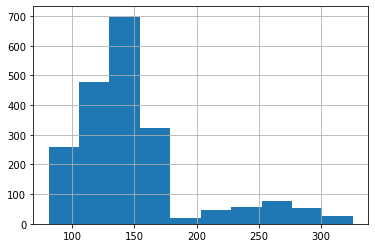

In [8]:
data['Close'].hist()

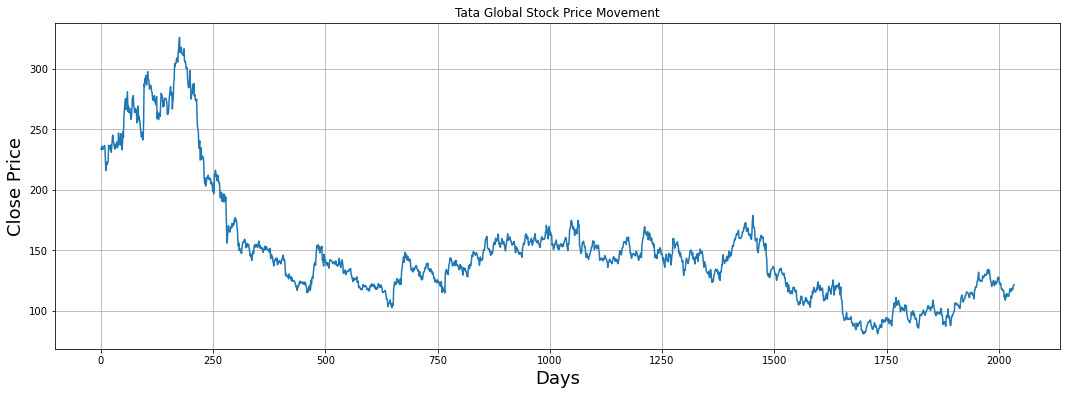

In [9]:
plt.figure(figsize=(18,6))
plt.title("Tata Global Stock Price Movement")
plt.plot(data['Close'])
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.grid()
plt.show()

<Figure size 1440x720 with 0 Axes>

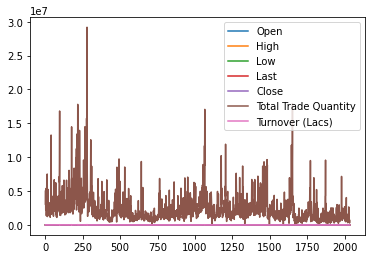

In [10]:
plt.figure(figsize=(20,10))
data.plot()

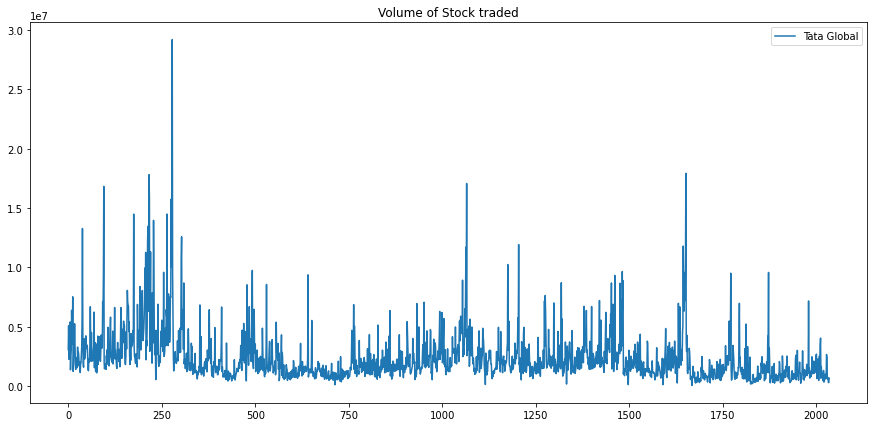

In [11]:
data['Total Trade Quantity'].plot(label = 'Tata Global', figsize = (15,7))
plt.title('Volume of Stock traded')
plt.legend()

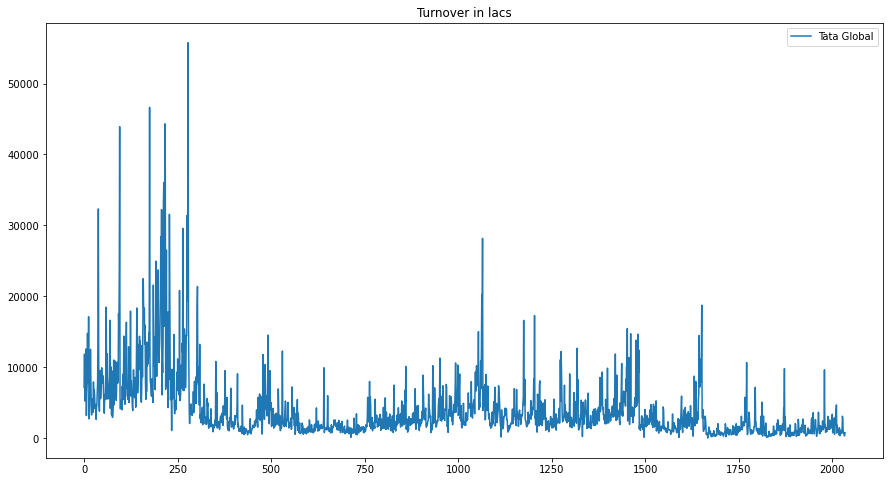

In [12]:
data['Turnover (Lacs)'].plot(label='Tata Global', figsize=(15,8))
plt.title('Turnover in lacs')
plt.legend()

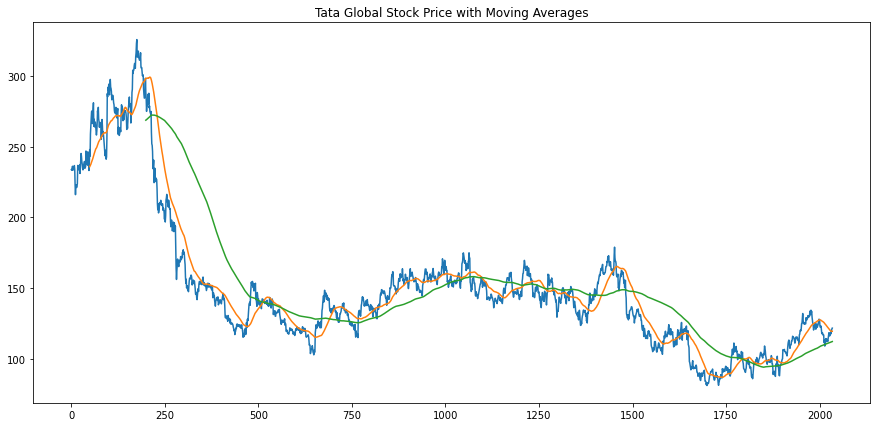

In [13]:
data['MA50'] = data['Open'].rolling(50).mean()
data['MA200'] = data['Open'].rolling(200).mean()
plt.title("Tata Global Stock Price with Moving Averages")
data['Close'].plot(figsize = (15,7))
data['MA50'].plot()
data['MA200'].plot()

In [14]:
data1=data.filter('Close')
dataset=data.values
training_data_len=math.ceil(len(data)*8)
training_data_len

16280

In [15]:
dataset

array([['2018-09-28', 234.05, 235.95, ..., 7162.35, nan, nan],
       ['2018-09-27', 234.55, 236.8, ..., 11859.95, nan, nan],
       ['2018-09-26', 240.0, 240.0, ..., 5248.6, nan, nan],
       ...,
       ['2010-07-23', 121.8, 121.95, ..., 340.31, 119.37500000000026,
        111.82924999999976],
       ['2010-07-22', 120.3, 122.0, ..., 355.17, 119.35500000000026,
        111.94074999999975],
       ['2010-07-21', 122.1, 123.0, ..., 803.56, 119.35100000000025,
        112.06049999999973]], dtype=object)

In [16]:
data=data.iloc[:,0:5]
data

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80
2031,2010-07-26,120.10,121.00,117.10,117.10
2032,2010-07-23,121.80,121.95,120.25,120.35
2033,2010-07-22,120.30,122.00,120.25,120.75


In [17]:
training_set=data.iloc[:,1:2]
training_set

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


# Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
data_training_scaled=scaler.fit_transform(training_set)

In [20]:
features_set=[]
labels=[]
for i in range(60,586):
    features_set.append(data_training_scaled[i-60:i,0])
    labels.append(data_training_scaled[i,0])

In [21]:
features_set,labels=np.array(features_set),np.array(labels)

In [22]:
features_set=np.reshape(features_set, (features_set.shape[0], features_set.shape[1],1 ))

# LSTM Model

In [26]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [27]:
model=Sequential()

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
model.fit(features_set,labels,epochs=50,batch_size=20)

Epoch 1/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 11/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 12/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 13/50
27/27 [==============================

In [31]:
data_testing_complete=pd.read_csv('C:\\Users\\Parth Salke\\Downloads\\Datasets\\NSE-TATAGLOBAL.CSV')
data_testing_processed=data_testing_complete.iloc[:,1:2]
data_testing_processed

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


# Prediction of Model

In [33]:
data_total=pd.concat((data['Open'], data['Open']), axis=0)

In [34]:
test_inputs = data_total[len(data_total) - len(data) - 60:].values
test_inputs.shape

(2095,)

In [35]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)

In [44]:
test_features = []
for i in range(60, 89):
  test_features.append(test_inputs[i-60:i, 0])

In [45]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0] - test_features.shape[1], 1))
test_features.shape

(1740, 1)

In [46]:
predictions = model.predict(test_features)

In [47]:
predictions

array([[0.20600162],
       [0.21654502],
       [0.21654502],
       ...,
       [0.67234385],
       [0.6605839 ],
       [0.64760745]], dtype=float32)

In [49]:
x_train=data[0:1256]
y_train=data[1:1257]
print(x_train.shape)
print(y_train.shape)

(1256, 5)
(1256, 5)


In [50]:
x_train

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
1251,2013-09-04,142.00,145.35,140.65,143.60
1252,2013-09-03,144.10,145.20,140.70,141.80
1253,2013-09-02,139.40,144.40,139.35,144.00
1254,2013-08-30,138.10,140.65,136.70,139.20


In [51]:
np.random.seed(1)
np.random.randn(3, 3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

In [52]:
np.random.normal(1)

0.7506296245225899

In [53]:
np.random.normal(5)

6.4621079370449745

In [55]:
np.random.seed(42)
np.random.normal(size=1000, scale=100).std()

97.87262077473541

# Plotting the results

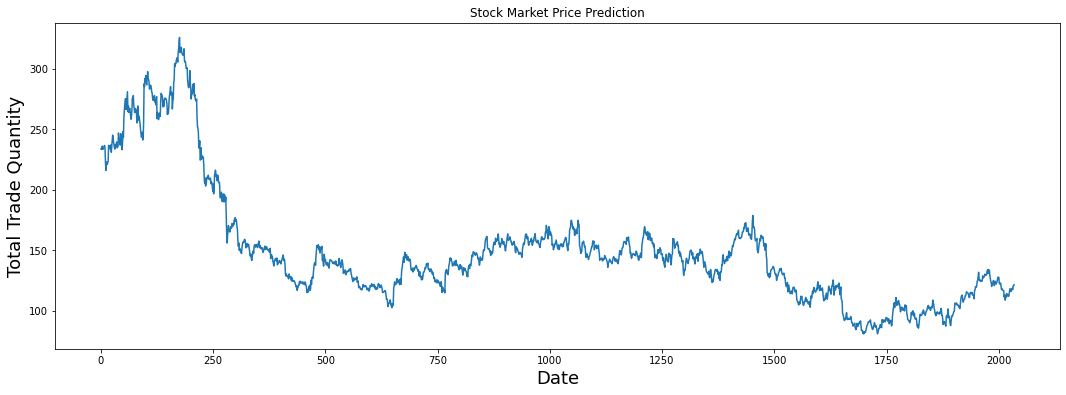

In [56]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(data_testing_complete['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

# Predicting future price closings

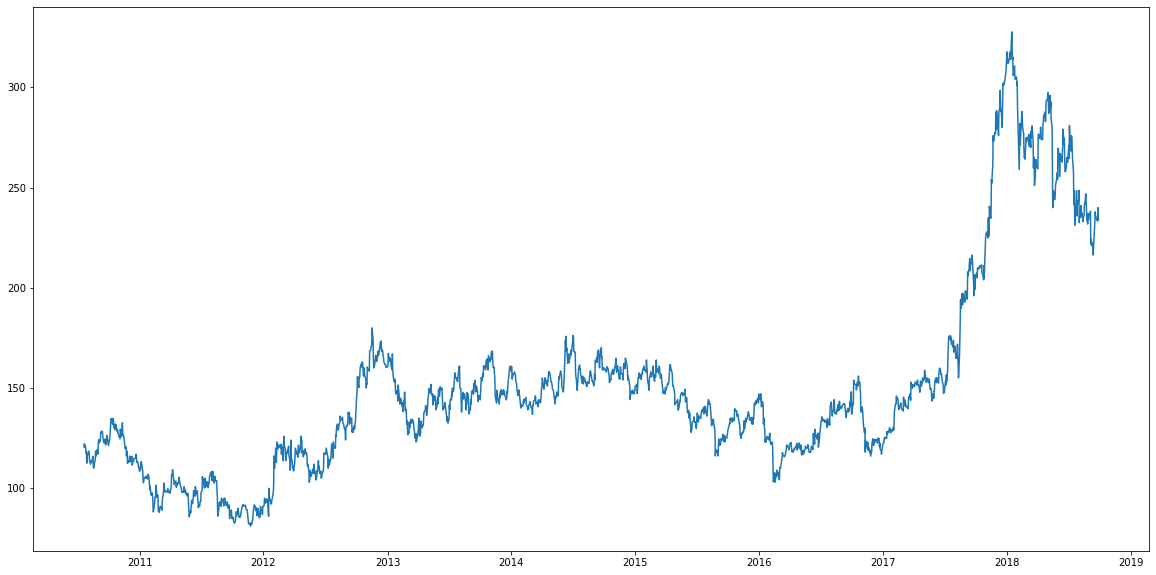

In [57]:
data["Date"] = pd.to_datetime(data.Date)
data.index = data['Date']

plt.figure(figsize=(20, 10))
plt.plot(data["Open"], label='ClosePriceHist')

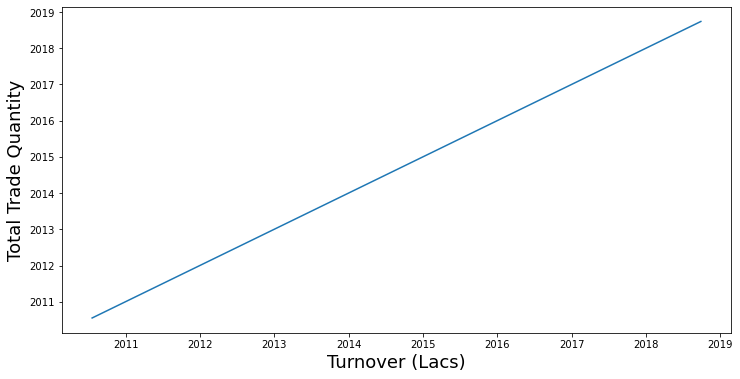

In [58]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'])
plt.xlabel('Turnover (Lacs)', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

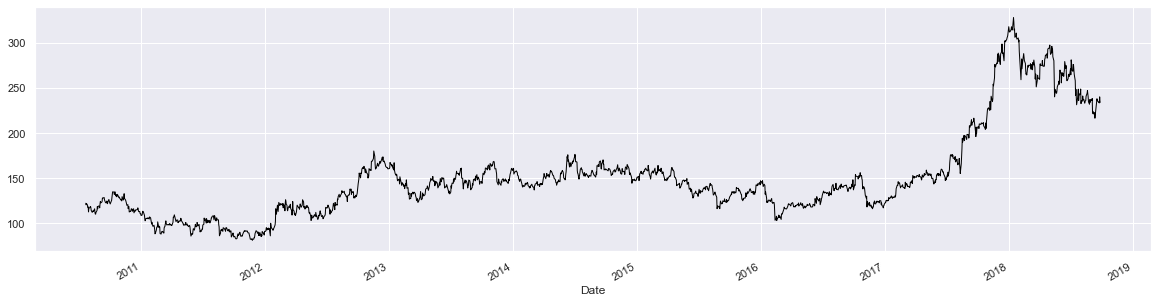

In [60]:
sns.set(rc = {'figure.figsize': (20, 5)})
data['Open'].plot(linewidth = 1,color='black')